In [1]:
import intake
import pandas as pd
import pprint
import fsspec

import numpy as np
import xarray as xr
import xgcm
import xesmf as xe
import s3fs

import matplotlib.patches as mpatches

import cftime
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline

In [2]:
ens_merged_34N = xr.open_dataset('/home/jovyan/amoc_heat_transport/34N_nocum/compnd_ens1.nc')
ensnum = 33

for n in range(2,ensnum+1):
    ens1 = xr.open_dataset('/home/jovyan/amoc_heat_transport/34N_nocum/compnd_ens' + str(n) + '.nc')
    ens_merged_34N =  xr.concat([ens_merged_34N,ens1],dim='ens')
    
ens_merged_26N = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens1.nc')
#ensnum = 10

for n in range(2,ensnum+1):
    ens1 = xr.open_dataset('/home/jovyan/amoc_heat_transport/26N_nocum/compnd_ens' + str(n) + '.nc')
    ens_merged_26N =  xr.concat([ens_merged_26N,ens1],dim='ens')
    
    
ens_merged_5S = xr.open_dataset('/home/jovyan/amoc_heat_transport/5S_nocum/compnd_ens1.nc')
#ensnum = 18

for n in range(2,ensnum+1):
    ens1 = xr.open_dataset('/home/jovyan/amoc_heat_transport/5S_nocum/compnd_ens' + str(n) + '.nc')
    ens_merged_5S =  xr.concat([ens_merged_5S,ens1],dim='ens')

In [3]:
def cov_fraction(moc, tot):
    covar = xr.cov(moc,tot,dim="time")/xr.cov(tot,tot,dim="time")
    return covar

def create_df(moc, tot, ind):
    moc10 = moc.rolling(time=10*12).mean()
    tot10 = tot.rolling(time=10*12).mean()
    df = pd.DataFrame({'overturning' + str(ind):cov_fraction(moc, tot).values,'overturning'+ str(ind) + '_10':cov_fraction(moc10, tot10).values},index =np.arange(1,ensnum+1)) 
    return df

In [4]:
ens_merged_34N

<xarray.Dataset>
Dimensions:              (time: 792, ens: 33, lonind: 1)
Coordinates: (12/54)
  * time                 (time) object 1940-01-16 12:00:00 ... 2005-12-16 12:...
    member_id            (ens) int64 1 2 3 4 5 6 7 8 ... 26 27 28 29 30 31 32 33
    T0_Kelvin            float64 273.1
    cp_air               float64 1.005e+03
    cp_sw                float64 3.996e+07
    days_in_norm_year    timedelta64[ns] 365 days
    ...                   ...
    TAREA                (time) float64 nan nan nan ... 5.298e+13 5.298e+13
    TLAT                 (time) float64 nan nan nan nan ... 33.64 33.64 33.64
    TLONG                (time) float64 nan nan nan nan ... 283.8 283.8 283.8
    UAREA                (time) float64 nan nan nan ... 5.27e+13 5.27e+13
    ULAT                 (time) float64 nan nan nan nan ... 33.85 33.85 33.85
    ULONG                (time) float64 nan nan nan nan ... 284.4 284.4 284.4
Dimensions without coordinates: ens, lonind
Data variables: (12/22)
    mathz_gyre           (ens, time) float64 nan nan nan ... 79.27 79.18 78.48
    mathz_ot             (ens, time) float64 965.1 967.8 972.4 ... 963.0 959.2
    net                  (ens, time) float64 -28.09 -29.17 ... -31.29 -30.88
    tot                  (ens, time) float64 nan nan nan ... 1.042e+03 1.038e+03
    mathd_gyre           (ens, time) float64 nan nan nan ... -127.5 -128.0
    mathd_ot             (ens, time) float64 nan nan nan ... 1.17e+03 1.166e+03
    ...                   ...
    ht_meantemp_left_dv  (ens, time) float64 nan nan nan ... 2.739e+08 2.73e+08
    ht_meantemp_down_dv  (ens, time) float64 nan nan nan ... 8.279e+07 8.254e+07
    max_MOC              (ens, time) float64 nan nan nan ... 2.107e+07 2.1e+07
    ht_meantemp_left_dt  (ens, time) float64 nan nan nan ... 2.789e+08 2.788e+08
    ht_meantemp_down_dt  (ens, time) float64 nan nan nan ... 8.339e+07 8.339e+07
    long_1               (ens, time) float64 nan nan nan ... -74.79 -74.79 -74.8

In [5]:

df1_34N = create_df(ens_merged_34N.mathz_ot, ens_merged_34N.tot, 1)

df2_34N = create_df(ens_merged_34N.mathd_ot, ens_merged_34N.tot, 2)

df_34N=df1_34N.join(df2_34N)

df3_34N = create_df(ens_merged_34N.talley_ot, ens_merged_34N.tot, 3)

df_34N=df_34N.join(df3_34N)

df4_34N = create_df(ens_merged_34N.west_ot, ens_merged_34N.tot, 4) 

df_34N=df_34N.join(df4_34N)



df1_26N = create_df(ens_merged_26N.mathz_ot, ens_merged_26N.tot, 1)

df2_26N = create_df(ens_merged_26N.mathd_ot, ens_merged_26N.tot, 2)

df_26N=df1_26N.join(df2_26N)

df3_26N = create_df(ens_merged_26N.talley_ot, ens_merged_26N.tot, 3)

df_26N=df_26N.join(df3_26N)

df4_26N = create_df(ens_merged_26N.west_ot, ens_merged_26N.tot, 4) 

df_26N=df_26N.join(df4_26N)


df1_5S = create_df(ens_merged_5S.mathz_ot, ens_merged_5S.tot, 1)

df2_5S = create_df(ens_merged_5S.mathd_ot, ens_merged_5S.tot, 2)

df_5S=df1_5S.join(df2_5S)

df3_5S = create_df(ens_merged_26N.talley_ot.where(ens_merged_26N.talley_ot<-10**10), ens_merged_26N.tot.where(ens_merged_26N.talley_ot<-10**10), 3)

df_5S=df_5S.join(df3_5S)

df4_5S = create_df(ens_merged_5S.west_ot, ens_merged_5S.tot, 4) 

df_5S=df_5S.join(df4_5S)

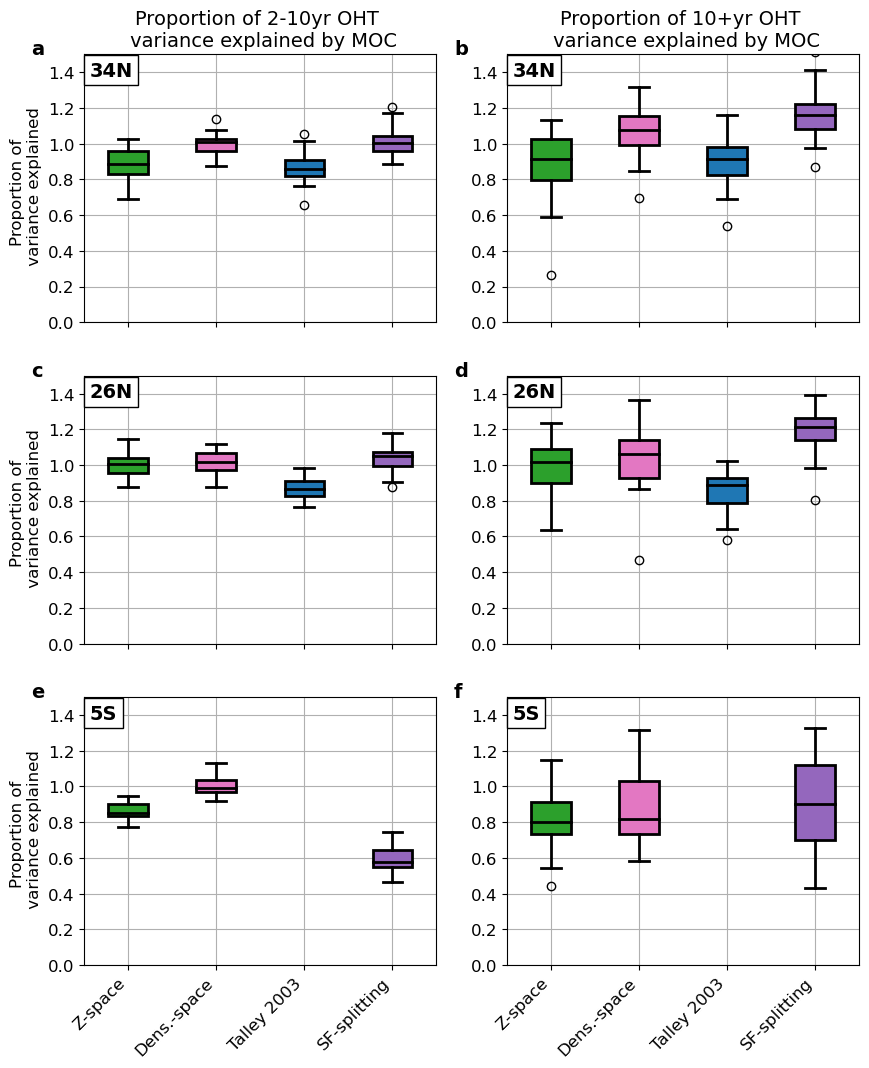

In [6]:
import matplotlib.patches as mpatches

matplotlib.rcParams.update({'font.size': 12})

fig=plt.figure(figsize=(10,16))

gs0 = gridspec.GridSpec(4, 2, figure=fig)


boxprops = dict(linewidth=2.0, color='black')
whiskerprops = dict(linestyle='-',linewidth=2.0, color='black')
medianprops = dict(linestyle='-',linewidth=2.0, color='black')
capprops = dict(linestyle='-',linewidth=2.0, color='black')
ax7 = fig.add_subplot(gs0[0, 0])
ax1,row = df_34N[['overturning1','overturning2','overturning3','overturning4']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['','','',''],ha='right')

ax1.set_ylabel('Proportion of \n variance explained')
plt.title('Proportion of 2-10yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.84,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'a',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '34N',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))


ax3 = fig.add_subplot(gs0[0, 1])
ax1,row = df_34N[['overturning1_10','overturning2_10','overturning3_10','overturning4_10']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['','','',''],ha='right')

#ax1.set_ylabel('Proportion of variance explained')
plt.title('Proportion of 10+yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.92,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'b',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '34N',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))


boxprops = dict(linewidth=2.0, color='black')
whiskerprops = dict(linestyle='-',linewidth=2.0, color='black')
medianprops = dict(linestyle='-',linewidth=2.0, color='black')
capprops = dict(linestyle='-',linewidth=2.0, color='black')
ax7 = fig.add_subplot(gs0[1, 0])
ax1,row = df_26N[['overturning1','overturning2','overturning3','overturning4']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['','','',''],ha='right')

ax1.set_ylabel('Proportion of \n variance explained')
#plt.title('Proportion of 2-10yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.84,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'c',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '26N',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))


ax3 = fig.add_subplot(gs0[1, 1])
ax1,row = df_26N[['overturning1_10','overturning2_10','overturning3_10','overturning4_10']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['','','',''],ha='right')

#ax1.set_ylabel('Proportion of variance explained')
#plt.title('Proportion of 10+yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.92,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'd',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '26N',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))


boxprops = dict(linewidth=2.0, color='black')
whiskerprops = dict(linestyle='-',linewidth=2.0, color='black')
medianprops = dict(linestyle='-',linewidth=2.0, color='black')
capprops = dict(linestyle='-',linewidth=2.0, color='black')
ax7 = fig.add_subplot(gs0[2, 0])
ax1,row = df_5S[['overturning1','overturning2','overturning3','overturning4']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['Z-space','Dens.-space','Talley 2003','SF-splitting'],ha='right')

ax1.set_ylabel('Proportion of \n variance explained')
#plt.title('Proportion of 2-10yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.84,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'e',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '5S',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))


ax3 = fig.add_subplot(gs0[2, 1])
ax1,row = df_5S[['overturning1_10','overturning2_10','overturning3_10','overturning4_10']].boxplot(patch_artist=True,rot=45,figsize=(6, 8),return_type='both',
                     boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops)

colors = ['tab:green', 'tab:pink', 'tab:blue','tab:purple']
for i,box in enumerate(row['boxes']):
    box.set_facecolor(colors[i])
    
#green_patch = mpatches.Patch(color='tab:green', label='Z-space')
#pink_patch = mpatches.Patch(color='tab:pink', label='Density space')
#blue_patch = mpatches.Patch(color='tab:blue', label='SF-splitting')
#plt.legend(handles=[green_patch, pink_patch,blue_patch])
plt.xticks([1, 2, 3, 4], ['Z-space','Dens.-space','Talley 2003','SF-splitting'],ha='right')

#ax1.set_ylabel('Proportion of variance explained')
#plt.title('Proportion of 10+yr OHT \n variance explained by MOC',fontsize=14)

#plt.axhline(0.92,color='grey')

plt.ylim(0,1.5)
plt.text(-0.1, 1.5, 'f',fontsize=14,fontweight='bold')
plt.text(0.56, 1.38, '5S',fontsize=14,fontweight='bold',bbox=dict(facecolor='white', alpha=1))

plt.savefig('box_and_whisker.png')